# Fuel Consumption Data Analysis: Regression Models

The data used for this project contains model-specific fuel consumption ratings and estimated carbon dioxide emissions for new light-duty vehicles for retail sale in Canada.

### Importing Data

In [1]:
#Importing the necessary packages for the project
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

In [2]:
#Downloading data from url
!wget -O FuelConsumption.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv

--2020-07-16 16:08:59--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 72629 (71K) [text/csv]
Saving to: ‘FuelConsumption.csv’

FuelConsumption.csv 100%[===================>]  70.93K  --.-KB/s    in 0.04s   

2020-07-16 16:08:59 (1.78 MB/s) - ‘FuelConsumption.csv’ saved [72629/72629]



In [3]:
#Reading data into a dataframe
df = pd.read_csv("FuelConsumption.csv")
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


### Exploratory Data Analysis

In [4]:
#Summarize the data
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [5]:
#Selecting features to explore further
cdf = df[["ENGINESIZE", "CYLINDERS", "CO2EMISSIONS", "FUELCONSUMPTION_COMB"]]
cdf.head()

,ENGINESIZE,CYLINDERS,CO2EMISSIONS,FUELCONSUMPTION_COMB
0,2.0,4,196,8.5
1,2.4,4,221,9.6
2,1.5,4,136,5.9
3,3.5,6,255,11.1
4,3.5,6,244,10.6


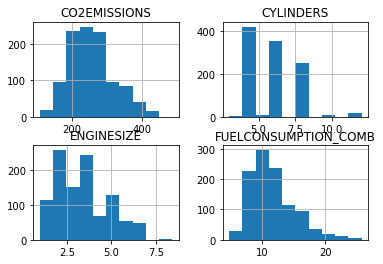

In [6]:
#Plotting some of the features on histograms
viz = cdf[['CYLINDERS','ENGINESIZE','CO2EMISSIONS','FUELCONSUMPTION_COMB']]
viz.hist()
plt.show()

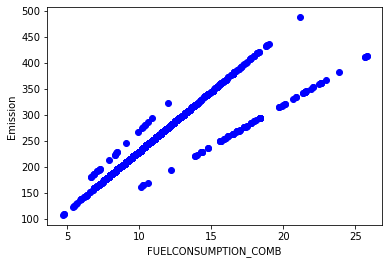

In [7]:
#Plotting each of the featuers vs emissions
plt.scatter(cdf["FUELCONSUMPTION_COMB"], cdf["CO2EMISSIONS"], color = "blue")
plt.xlabel("FUELCONSUMPTION_COMB")
plt.ylabel("Emission")
plt.show()

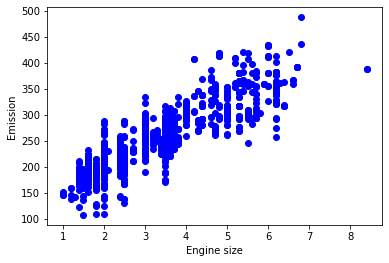

In [8]:
plt.scatter(cdf["ENGINESIZE"], cdf["CO2EMISSIONS"],  color = "blue")
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

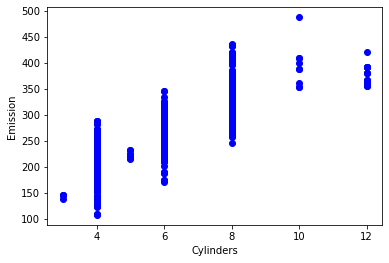

In [9]:
plt.scatter(cdf["CYLINDERS"], cdf["CO2EMISSIONS"],  color = "blue")
plt.xlabel("Cylinders")
plt.ylabel("Emission")
plt.show()

### Simple Linear Regression Model

In [10]:
#Splitting the data into training and testing sets (80% of entire data for training and the rest for testing)
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

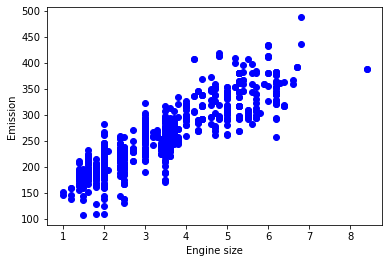

In [11]:
#Plotting the training data (ENGINESIZE VS CO2EMISSIONS)
plt.scatter(train["ENGINESIZE"], train["CO2EMISSIONS"], color = "blue")
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

In [12]:
#Modeling using sklearn
#Importing sklearn package
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[["ENGINESIZE"]])
train_y = np.asanyarray(train[["CO2EMISSIONS"]])
regr.fit(train_x, train_y)
print("Coefficients: ", regr.coef_, "\nIntercept: ", regr.intercept_)

Coefficients:  [[38.91578106]] 
Intercept:  [125.46256187]


Text(0, 0.5, 'Emission')

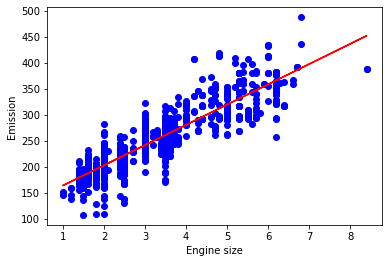

In [13]:
#Plotting the training data (ENGINESIZE VS CO2EMISSIONS) with the linear model
plt.scatter(train["ENGINESIZE"], train["CO2EMISSIONS"], color = "blue")
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], "-r")
plt.xlabel("Engine size")
plt.ylabel("Emission")

In [14]:
#Evalution of the model by calculating the mean absolute error, mean square error, and r-squared score
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[["ENGINESIZE"]])
test_y = np.asanyarray(test[["CO2EMISSIONS"]])
test_yhat = regr.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_yhat - test_y)))
print("Mean square error: %.2f" % np.mean((test_yhat - test_y) ** 2))
print("R-squared score: %.2f" % r2_score(test_yhat , test_y))

Mean absolute error: 26.20
Mean square error: 1158.84
R-squared score: 0.57


### Multiple Linear Regression Model

In [15]:
regr1 = linear_model.LinearRegression()
x = np.asanyarray(train[["ENGINESIZE", "CYLINDERS", "FUELCONSUMPTION_COMB"]])
y = np.asanyarray(train[["CO2EMISSIONS"]])
regr1.fit(x, y)
print("Coefficients: ", regr1.coef_)

Coefficients:  [[11.04450108  8.38686264  8.88876848]]


In [16]:
#Multiple linear regression model predictions
yhat = regr1.predict(test[["ENGINESIZE", "CYLINDERS", "FUELCONSUMPTION_COMB"]])
x = np.asanyarray(test[["ENGINESIZE", "CYLINDERS", "FUELCONSUMPTION_COMB"]])
y = np.asanyarray(test[["CO2EMISSIONS"]])
print("Mean square error: %.2f" % np.mean((yhat - y) ** 2))
print("Variance score: %.2f" % regr1.score(x, y))

Mean square error: 627.07
Variance score: 0.84


### Polynomial Regression Model

In [18]:
#Importing polynomial features package from sklearn
from sklearn.preprocessing import PolynomialFeatures
train_x = np.asanyarray(train[["ENGINESIZE"]])
train_y = np.asanyarray(train[["CO2EMISSIONS"]])
test_x = np.asanyarray(test[["ENGINESIZE"]])
test_y = np.asanyarray(test[["CO2EMISSIONS"]])

#Creating a second degree polynomial model
poly = PolynomialFeatures(degree = 2)
train_x_poly = poly.fit_transform(train_x)
train_x_poly

array([[ 1.  ,  2.  ,  4.  ],
       [ 1.  ,  2.4 ,  5.76],
       [ 1.  ,  1.5 ,  2.25],
       ...,
       [ 1.  ,  3.  ,  9.  ],
       [ 1.  ,  3.  ,  9.  ],
       [ 1.  ,  3.2 , 10.24]])

In [19]:
#Determining the coefficients and intercept of the model using linear regression
clf = linear_model.LinearRegression()
train_y = clf.fit(train_x_poly, train_y)

print("Coefficients: ", clf.coef_, "\nIntercept: ", clf.intercept_)

Coefficients:  [[ 0.         50.94575577 -1.59919259]] 
Intercept:  [106.38862954]


Text(0, 0.5, 'Emission')

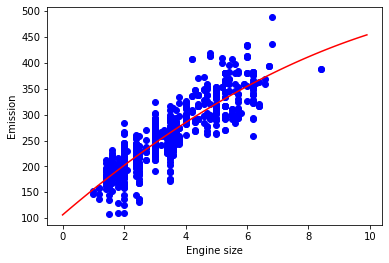

In [22]:
#Plotting the model
plt.scatter(train["ENGINESIZE"], train["CO2EMISSIONS"], color = "blue")
XX = np.arange(0.0 , 10.0, 0.1)
YY = clf.intercept_[0] + clf.coef_[0][1] * XX + clf.coef_[0][2] * np.power(XX, 2)
plt.plot(XX, YY, "-r")
plt.xlabel("Engine size")
plt.ylabel("Emission")

In [23]:
#Evaluation of the model by calculating the mean absolute error, mean square eror, and r-squared value
test_x_poly = poly.fit_transform(test_x)
test_y_ = clf.predict(test_x_poly)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Mean square error: %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R square score: %.2f" % r2_score(test_y_, test_y))

Mean absolute error: 26.42
Mean square error: 1157.63
R square score: 0.58
